## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [6]:
#okay lets get the boilerplate out of the way.
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze',
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports',
           'export-administration-act-south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header = None, names = columns, na_values = '?')

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#and lets clean it up. y/n replaced with 1 and 0 for boolean.
df.replace({'y': 1, 'n': 0}, inplace = True)

In [8]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#lets go ahead and split these up
dem = df[df['party'] == 'democrat'].copy(deep = True)
rep = df[df['party'] == 'republican'].copy(deep = True)

In [0]:
#now lets kill the party column, we know by variable name who is who
dem.drop('party', axis = 1, inplace = True)
rep.drop('party', axis = 1, inplace = True)

In [13]:
print(dem.shape)
dem.head(2)

(267, 16)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [14]:
print(rep.shape)
rep.head(2)

(168, 16)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [33]:
#okay so basically we have to take one of our tests from last asignment, show what the confidence
#interval means in relationship to the null hypothesis.  I think, if I have time I'll do 2 for comparison sake.
#but I'll start with one where I can not reject the null hypothesis 'immigration'.

#null hypo: no sig dif between dem and rep votes.  Basically |rep.mean() - dem.mean()| = 0
#alternative: there is a significant difference between rep and dem votes.

#so lets see what our actual null hypo is:
null_hypo = rep['immigration'].dropna().mean() - dem['immigration'].dropna().mean()
print(null_hypo)

0.08609286784191733


In [0]:
#forgot these imports
from scipy.stats import t

In [34]:
#okay. so now I need to figure out the confidence interval.  I think that means I take 
#only two means, the rep votes and the dem votes, and go from there. Not sure so I'm going
#to just take a stab at it

immigration_means = [dem['immigration'].dropna().mean(), rep['immigration'].dropna().mean()]

#sample size
n = len(immigration_means)

#degrees of freedom
dof = n - 1

#the mean of means
mean = np.mean(immigration_means)

#sample standard deviation
sample_std = np.std(immigration_means, ddof = 1)

#standard error
std_err = sample_std / n**.5

#lets get that interval
CI = t.interval(.95, dof, loc = mean, scale = std_err)
print('95% Confidence Interval: ', CI)

95% Confidence Interval:  (-0.032427478918197195, 1.0614861262277953)


In [35]:
#So I expect the null hypothesis should be in the middle of these bounds
#which would mean we can not reject them.
CI[0] < null_hypo < CI[1]

True

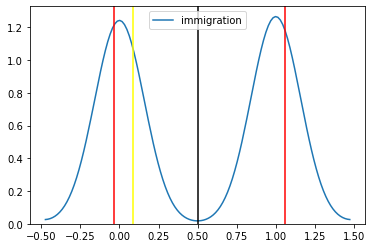

In [36]:
#Okay what we expected, now lets graph and Interpret
#the graph should span all the votes for the immigration vote.

sns.kdeplot(df['immigration'].dropna())
plt.axvline(x = CI[0], color = 'red')
plt.axvline(x = CI[1], color = 'red')
plt.axvline(x = df['immigration'].dropna().mean(), color = 'k')
plt.axvline(x = null_hypo, color = 'yellow');

###Interpretation###
So our alternative hypothesis is that there is a significant difference between the way republicans and democrats voted on the immigration bill.

So what we should expect to see, if our alternative hypothesis is correct, is a graph skewed in one direction. But we don't, we actually see two pretty even humps.

I also plotted the numeric representation of the null hypothesis.  So basically null hypo says that difference between the mean votes should be exactly zero.  But we get somethig greater than zero.  Does that mean we can reject the null hypothesis?

No it doesn't, because the value we got, is within our confidence interval.  Which means, we can't confidently say that .086 difference in voting averages (favoring republicans) is an outlier for the immigration issue.  That is within the realm of chance.

###Chi-Squared Tests###

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)